In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Тема: Определение перспективного тарифа для телеком-компании

## Изучение данных

Откроем и сохраним в переменные наши данные:

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Напишим цикл для того, чтобы сразу открыть первые 5 строк наших датасетов для изучения:

In [3]:
datas = { "call_frame":calls,
         "internet_frame":internet,
         "messages_frame":messages,
         "users_frame":users,
         "tariffs_frame":tariffs
        } #создадим словарь для того, чтобы можно было по нему пробежаться

for name, set in datas.items():
    display(name.upper())
    display(
        set.head(), #открываем фрейм
        set.info(), #выводим информацию о фрейме
        set.isna().sum(), #посмотрим на пропуски
        set.duplicated().sum() #выведем явные дубликаты для изучения
    )

'CALL_FRAME'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


None

id           0
call_date    0
duration     0
user_id      0
dtype: int64

0

'INTERNET_FRAME'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


None

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

0

'MESSAGES_FRAME'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


None

id              0
message_date    0
user_id         0
dtype: int64

0

'USERS_FRAME'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


None

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

0

'TARIFFS_FRAME'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


None

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

0

**Вывод** 

Представлено 5 датасетов каждый из которых содержит:

1) Информацию о звонках. Содержит 4 столбца:

* `id` — уникальный номер звонка. Тип данных: `object`
* `call_date` — дата звонка. Тип данных: `object`
* `duration` — длительность звонка в минутах. Тип данных: `float64`
* `user_id` — идентификатор пользователя, сделавшего звонок. Тип данных: `int64`

2) Информацию об интернет-сессиях. Содержит 4 столбца:

* `id` — уникальный номер сессии. Тип данных:  `object`
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах). Тип данных: `float64`
* `session_date` — дата интернет-сессии. Тип данных: `object`
* `user_id` — идентификатор пользователя. Тип данных: `int64`

3) Информацию о сообщениях. Содержит 3 столбца:

* `id` — уникальный номер сообщения. Тип данных: `object`
* `message_date` — дата сообщения. Тип данных: `object`
* `user_id` — идентификатор пользователя, отправившего сообщение. Тип данных: `int64`

4) Информацию о тарифах. Содержит 8 столбцов:

* `tariff_name` — название тарифа. Тип данных: `object`
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях. Тип данных: `int64`
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату. Тип данных: `int64`
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату. Тип данных: `int64`
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах). Тип данных: `int64`
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата). Тип данных: `int64`
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета. Тип данных: `int64`
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта). Тип данных: `int64`

5) Информацию о пользователях. Содержит 8 столбцов:

* `user_id` — уникальный идентификатор пользователя. Тип данных: `int64`
* `first_name` — имя пользователя. Тип данных: `object`
* `last_name` — фамилия пользователя. Тип данных: `object`
* `age` — возраст пользователя (годы). Тип данных: `int64`
* `reg_date` — дата подключения тарифа (день, месяц, год). Тип данных: `object`
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Тип данных: `object`
* `city` — город проживания пользователя. Тип данных: `object`
* `tarif` — название тарифного плана. Тип данных: `object`


В датафрейме `users` имеются пропущенные значения в столбце `churn_date`, однако, как сказано в описательной документации, если отсутвует значение, значит тариф еще работает. Пропуски не заполняем.

Во всех датафреймах дата представена в формате `object`, переведем ее в формат `datetime`.

Политика компании гласит, что все звонки округляются до минут в большую сторону, поэтому в датафреймме `calls`, округлим время всех звонков до минут в большую сторону. А мегабайты округляются до гигабайт в большую сторону.

## Предобработка данных

В фрейме содержащий информацию о интернет-сессиях есть ненужный столбец `Unnamed: 0`, поэтому просто дропнем его:

In [4]:
internet = internet.drop(['Unnamed: 0'], axis = 1)

### Смена типа данных формата даты

Изменим тип данных в столбцах с датой на datatime:

In [5]:
columns_to_datetime = { "call_date":calls,
                       "session_date":internet,
                       "message_date":messages,
                       "reg_date":users 
                      } #создаем словарь

for date, frame in columns_to_datetime.items(): 
    frame[date] = pd.to_datetime(frame[date], format = '%Y-%m-%d')

### Обработка времени звонков

Округлим время звонков до целого числа в большую сторону, согласно политики компании Мегалайн:

In [6]:
calls['duration'] = np.ceil(calls['duration'])

### Обработка по пользователям

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

Cгруппируем данные из датасета `calls` по столбцам `user_id`, `call_date` для того чтобы посчитать количество сделанных звонков и израсходованных минут по месяцам для каждого клиента. Для начала создадим новый столбец в котром будут значения месяцов в которые абоненты совершали звонки:

In [7]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month #выделим месяца из полной даты

Проведем группировку:

In [8]:
group_calls =  (calls
    .groupby(['user_id', 'month'])
    .agg({'duration': ['count', 'sum']})
               )

display(group_calls)

duration       
                 count    sum
user_id month                
1000    5           22  159.0
        6           43  172.0
        7           47  340.0
        8           52  408.0
        9           58  466.0
...                ...    ...
1498    10          41  247.0
1499    9            9   70.0
        10          68  449.0
        11          74  612.0
        12          69  492.0

[3174 rows x 2 columns]

Получили то, что и задумывали!

#### Количество отправленных сообщений по месяцам

In [9]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [10]:
group_messages =  (messages
    .groupby(['user_id', 'month'])
    .agg({'id': 'count'})
     
               )

display(group_messages)

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

#### Объем израсходованного интернет-трафика по месяцам

In [11]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

Так как компания производит расчет стоимости услуг за использование интернета в гигабайтах, то для начала создадим новый столбик с переводом израсходованного трафика клиента из мегабайтов в гигагбайты:

In [12]:
internet['gigabyte'] = internet['mb_used']/1024

Затем произведем группировку по столбцам `user_id`, `month` и `gigabyte` для того, чтобы посчитать сколько израсходовал клиент интернет трафика в определенный месяц. Так как компания округляет интернет трафик в большую сторону, то после группировки сделаем округление суммарного трафика в большую сторону:

In [13]:
group_internet =  (internet
    .groupby(['user_id', 'month'])
    .agg({'gigabyte': 'sum'})
               )
group_internet['gigabyte'] = np.ceil(group_internet['gigabyte'])  #округляем в большую сторону
display(group_internet)

gigabyte
user_id month          
1000    5           3.0
        6          23.0
        7          14.0
        8          14.0
        9          15.0
...                 ...
1498    10         21.0
1499    9           2.0
        10         18.0
        11         18.0
        12         13.0

[3203 rows x 1 columns]

#### Обработка фрейма tariffs

Для дальнейшей корректной работы с фреймом `tariffs` сделаем следущее:

1) переведем мегабайты в гигабайты в столбце `mb_per_month_included`

2) переменуем столбцы `mb_per_month_included` в `gb_per_month_included` и `tariff_name` в `tariff`.

In [14]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included']/1024 # переводим

In [15]:
tariffs.rename(columns = {'mb_per_month_included': 'gb_per_month_included', 'tariff_name': 'tariff'}, inplace=True) #переименовываем

In [16]:
tariffs.head() #проверяем

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


#### Объединение таблицы

Объединим наши бейби-фреймы в один большой папа-фрейм для того, чтобы в дальнейшем узнать выручку с каждого пользователя.

In [17]:
big_set = group_calls.merge(group_messages, on = ['user_id', 'month'], how = 'outer') #объединяем

big_set = (big_set
           .merge(group_internet, on = ['user_id', 'month'], how = 'outer')
           .reset_index(level='month')
          ) #объединяем


big_set.columns = ['month', 'number_of_calls', 'duration_of_calls', 'number_of_messages', 'gb_used'] #переменовываем

big_set = big_set.merge(users[['user_id', 'tariff', 'city']], on = 'user_id', how = 'outer') #объединяем
big_set = big_set.merge(tariffs, on = 'tariff', how = 'outer') #объединяем
display(big_set)

/opt/conda/lib/python3.9/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,user_id,month,number_of_calls,duration_of_calls,number_of_messages,gb_used,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,22.0,3.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1
1,1000,6.0,43.0,172.0,60.0,23.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1
2,1000,7.0,47.0,340.0,75.0,14.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1
3,1000,8.0,52.0,408.0,81.0,14.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1
4,1000,9.0,58.0,466.0,57.0,15.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,NaN,NaN,32.0,17.0,smart,Санкт-Петербург,50,15.0,500,550,200,3,3
3212,1489,10.0,NaN,NaN,21.0,20.0,smart,Санкт-Петербург,50,15.0,500,550,200,3,3
3213,1489,11.0,NaN,NaN,20.0,18.0,smart,Санкт-Петербург,50,15.0,500,550,200,3,3
3214,1489,12.0,NaN,NaN,35.0,17.0,smart,Санкт-Петербург,50,15.0,500,550,200,3,3


Посмотрим сколько пропусков есть в нашем фрейме

In [18]:
big_set.isna().sum()

user_id                    0
month                      2
number_of_calls           42
duration_of_calls         42
number_of_messages       499
gb_used                   13
tariff                     0
city                       0
messages_included          0
gb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

In [19]:
big_set[big_set['month'].isna()]

,user_id,month,number_of_calls,duration_of_calls,number_of_messages,gb_used,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,1128,NaN,NaN,NaN,NaN,NaN,ultra,Волжский,1000,30.0,3000,1950,150,1,1
3215,1371,NaN,NaN,NaN,NaN,NaN,smart,Омск,50,15.0,500,550,200,3,3


В столбце month есть два пропущенных значения, т.е. мы не знаем в какой месяц (причем единственный месяц) абонент пользовался услугами связи. В связи с этим принято решение удалить данные строки.

In [20]:
big_set = big_set.dropna(subset=['month'])

#### Помесячная выручка с каждого клиента

Для того, чтобы посчитать помесячную выручку с каждого клиента напишем функцию, которая будет сравнивать количество потраченных минут, сообщений, интернета в месяц с включеными в тариф. Если потраченные значения будут превышать включенные в тариф значения, то функция будет подсчитывать траты сверх стоимости тарифа.

In [21]:
def give_my_money_dude(row):
    
    calls_over_the_tariff = 0
    messages_over_the_tariff = 0
    internet_over_the_tarif = 0
    rub_monthly_fee= row['rub_monthly_fee']
    
    if row['duration_of_calls']>row['minutes_included']:
        calls_over_the_tariff+=(row['duration_of_calls']-row['minutes_included'])*row['rub_per_minute']
        
    if row['number_of_messages']>row['messages_included']:
        messages_over_the_tariff+=(row['number_of_messages']-row['messages_included'])*row['rub_per_message']
        
    if row['gb_used']>row['gb_per_month_included']:
        internet_over_the_tarif+=(row['gb_used']-row['gb_per_month_included'])*row['rub_per_gb']
        
    return calls_over_the_tariff+messages_over_the_tariff+internet_over_the_tarif+rub_monthly_fee

Применим функцию к нашему папа-фрейму и создадим столбец, где будет хранится выручка за каждый месяц с каждого клиента:

In [22]:
big_set['total_bill'] = big_set.apply(give_my_money_dude, axis=1)
display(big_set)

,user_id,month,number_of_calls,duration_of_calls,number_of_messages,gb_used,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_bill
0,1000,5.0,22.0,159.0,22.0,3.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1,1950.0
1,1000,6.0,43.0,172.0,60.0,23.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1,1950.0
2,1000,7.0,47.0,340.0,75.0,14.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1,1950.0
3,1000,8.0,52.0,408.0,81.0,14.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1,1950.0
4,1000,9.0,58.0,466.0,57.0,15.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,1489,8.0,NaN,NaN,17.0,11.0,smart,Санкт-Петербург,50,15.0,500,550,200,3,3,550.0
3211,1489,9.0,NaN,NaN,32.0,17.0,smart,Санкт-Петербург,50,15.0,500,550,200,3,3,950.0
3212,1489,10.0,NaN,NaN,21.0,20.0,smart,Санкт-Петербург,50,15.0,500,550,200,3,3,1550.0
3213,1489,11.0,NaN,NaN,20.0,18.0,smart,Санкт-Петербург,50,15.0,500,550,200,3,3,1150.0


## Анализ данных

### Сколько тратят минут в месяц

Для того, чтобы посчитать сколько тратят клиенты минут на разговор помесячно по каждому тарифу создадим сводную таблицу:

In [23]:
minutes_per_month = (big_set
                     .pivot_table(index=['month', 'tariff'],
                                         values = 'duration_of_calls',
                                         aggfunc = sum)
                    ).reset_index()

minutes_per_month

,month,tariff,duration_of_calls
0,1.0,smart,6931.0
1,1.0,ultra,3853.0
2,2.0,smart,17324.0
3,2.0,ultra,7131.0
4,3.0,smart,30034.0
5,3.0,ultra,18117.0
6,4.0,smart,41119.0
7,4.0,ultra,25191.0
8,5.0,smart,54618.0
9,5.0,ultra,34192.0


Визуализируем количество потраченных минут помесячно по каждому тарифу:

<AxesSubplot:title={'center':'ultra'}, xlabel='month'>

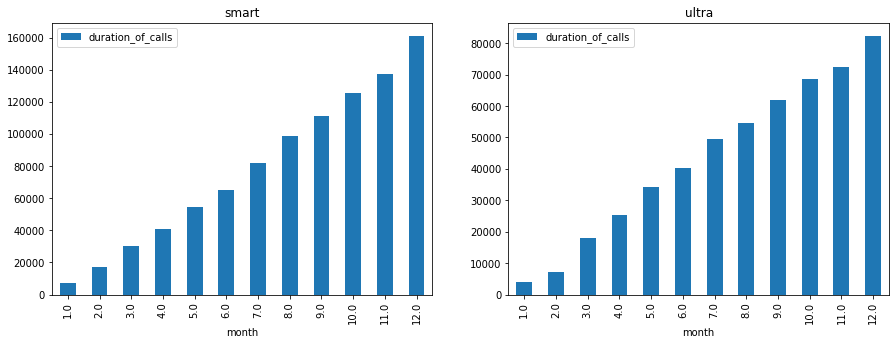

In [24]:
fig, axs = plt.subplots(1,2)

(minutes_per_month
 .query('tariff == "smart"')
 .plot(x='month' , y='duration_of_calls', kind = 'bar', title='smart', ax=axs[0], figsize = (15, 5))
)

(minutes_per_month
 .query('tariff == "ultra"')
 .plot(x='month' , y='duration_of_calls', kind = 'bar', title='ultra', ax=axs[1], figsize = (15, 5))
)

На столбчатой диаграмме видно, что с каждым месяцем продолжительность звонков по каждому тарифу росло, скорее всего это связано с ежемесячным приростом абонентов за 2018 год. Однако, клиенты тарифа смарт на конец года потратили минут в 2 раза больше.

Построим гистаграммы плотностей. Для начала выделим в отдельные перменные продолжительность звоков по тарифу смарт и ультра:

In [25]:
smart_call = big_set[big_set['tariff']=='smart']['duration_of_calls'] #выделим отдельный датасет с продолжительностью звонков smart
ultra_call = big_set[big_set['tariff']=='ultra']['duration_of_calls'] #выделим отдельный датасет с продолжительностью звонков ultra

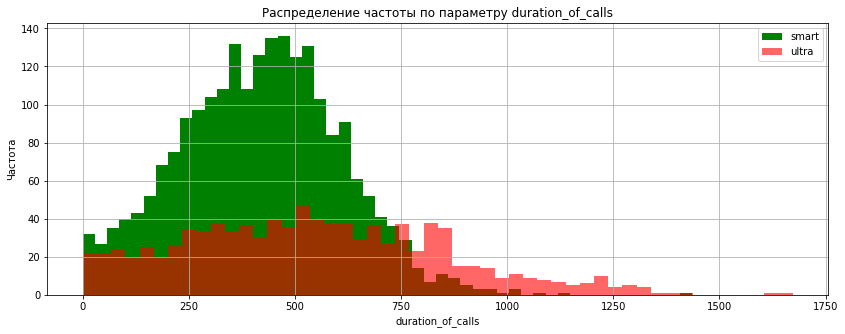

In [26]:
plt.figure(figsize=(14, 5))


smart_call.hist( bins = 50,  color='green', label = 'smart')
ultra_call.hist( bins = 50, color='red', alpha=0.6, label = 'ultra')

plt.title('Распределение частоты по параметру duration_of_calls')
plt.xlabel('duration_of_calls')
plt.ylabel('Частота')
plt.legend()

Гистограмма тарифа смарт выглядит семитрично, без сильных скосов. Если посмотреть на медианное и средне значение (рассчитано ниже), то исходя из них можно сказать, что значения одинаковые и гистограмма семитрична. Гистограмма тарифа ультра скошена вправа, что подтверждают средние и медианные значения (медианное значение меньше среднего.) Абоненты тарифа ультра не расходуют включеные минуты на звонки (3000 минут), в тарифе смарт, напротив, клиенты частенько тратят включенные минуты звонков сверх нормы (500 минут). 

Расчитаем дисперсию, среднее значение, стандартное отклонение и медиану по каждому тарифу:

In [27]:
var_call_smart = np.var(smart_call) # Дисперсия
mean_smart_call = smart_call.describe()[1] # Среднее значение
std_smart_call = smart_call.describe()[2] #Стандартное отклонение
median_smart_call = smart_call.median()
display(f'Среднее значение длительности звонков по тарифу smart составляет {mean_smart_call}') 
display(f'Стандратное отклонение длительности звонков по тарифу smart составляет {std_smart_call}')
display(f'Дисперсия длительности звонков по тарифу smart составляет {var_call_smart}')
display(f'Медианное знаение длительности звонков по тарифу smart составляет {median_smart_call}')

smart_call.describe()

'Среднее значение длительности звонков по тарифу smart составляет 419.0629779577148'

'Стандратное отклонение длительности звонков по тарифу smart составляет 189.3256177894154'

'Дисперсия длительности звонков по тарифу smart составляет 35828.06530953033'

'Медианное знаение длительности звонков по тарифу smart составляет 423.0'

count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: duration_of_calls, dtype: float64

In [28]:
var_call_ultra = np.var(ultra_call) # Дисперсия
mean_ultra_call = ultra_call.describe()[1] # Среднее значение
std_ultra_call = ultra_call.describe()[2] #Стандартное отклонение
median_ultra_call = ultra_call.median()

display(f'Среднее значение длительности звонков по тарифу smart составляет {mean_ultra_call}') 
display(f'Стандратное отклонение длительности звонков по тарифу smart составляет {std_ultra_call}')
display(f'Дисперсия длительности звонков по тарифу smart составляет {var_call_ultra}')
display(f'Медианное знаение длительности звонков по тарифу smart составляет {median_ultra_call}')

ultra_call.describe()

'Среднее значение длительности звонков по тарифу smart составляет 545.4511041009464'

'Стандратное отклонение длительности звонков по тарифу smart составляет 306.92575388218586'

'Дисперсия длительности звонков по тарифу smart составляет 94104.36117385984'

'Медианное знаение длительности звонков по тарифу smart составляет 528.0'

count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: duration_of_calls, dtype: float64

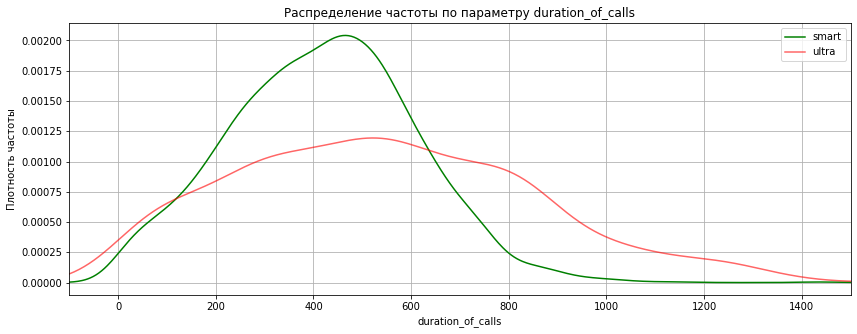

In [29]:
plt.figure(figsize=(14, 5))
smart_call.plot( kind='kde',   color='green', label = 'smart')
ultra_call.plot( kind='kde',  color='red', alpha=0.6, label = 'ultra')

plt.title('Распределение частоты по параметру duration_of_calls')
plt.xlabel('duration_of_calls')
plt.ylabel('Плотность частоты')
plt.legend()
plt.grid()
plt.xlim([-100,1500])
plt.show()

### Сколько отправляют сообщенйи в месяц

Создадим сводную таблицу по суммарному количеству отправленных сообщений по каждому месяцу и тарифу:

In [30]:
messages_per_month = (big_set
                     .pivot_table(index=['month', 'tariff'],
                                         values = 'number_of_messages',
                                         aggfunc = sum)
                    ).reset_index()

minutes_per_month

,month,tariff,duration_of_calls
0,1.0,smart,6931.0
1,1.0,ultra,3853.0
2,2.0,smart,17324.0
3,2.0,ultra,7131.0
4,3.0,smart,30034.0
5,3.0,ultra,18117.0
6,4.0,smart,41119.0
7,4.0,ultra,25191.0
8,5.0,smart,54618.0
9,5.0,ultra,34192.0


Визуализируем количество отправленных сообщений помесячно по каждому тарифу:

<AxesSubplot:title={'center':'ultra'}, xlabel='month'>

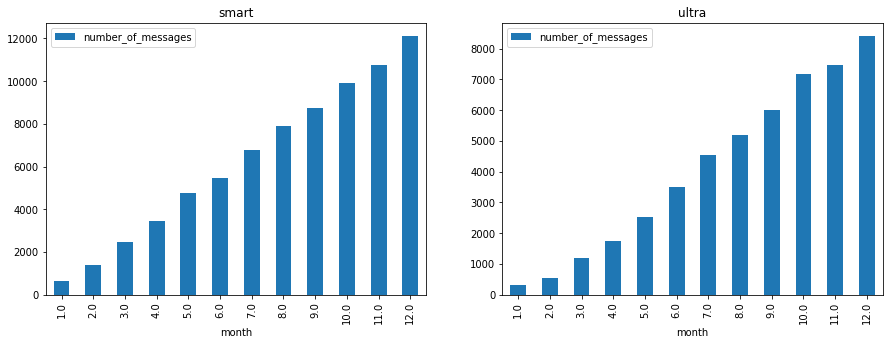

In [31]:
fig, axs = plt.subplots(1,2)

(messages_per_month
 .query('tariff == "smart"')
 .plot(x='month' , y='number_of_messages', kind = 'bar', title='smart', ax=axs[0], figsize = (15, 5))
)

(messages_per_month
 .query('tariff == "ultra"')
 .plot(x='month' , y='number_of_messages', kind = 'bar', title='ultra', ax=axs[1], figsize = (15, 5))
)

Видно, что с каждым месяцем количество отправленных сообщени становилось только больше.

Построим гистограммы плотностей, для этого соберем в отдельные переменные количество отправленных сообщений по тарифам смарт и ультра:

In [32]:
smart_messages = big_set[big_set['tariff']=='smart']['number_of_messages']
ultra_messages = big_set[big_set['tariff']=='ultra']['number_of_messages']

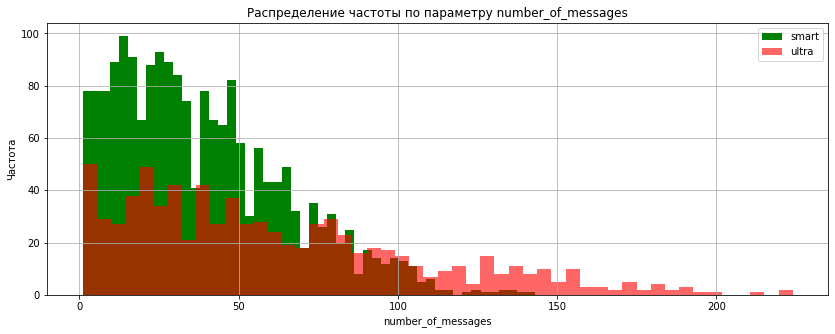

In [33]:
plt.figure(figsize=(14, 5))
 

smart_messages.hist( bins = 50,  color='green', label = 'smart')
ultra_messages.hist( bins = 50, color='red', alpha=0.6, label = 'ultra')


plt.title('Распределение частоты по параметру number_of_messages')
plt.xlabel('number_of_messages')
plt.ylabel('Частота')
plt.legend()

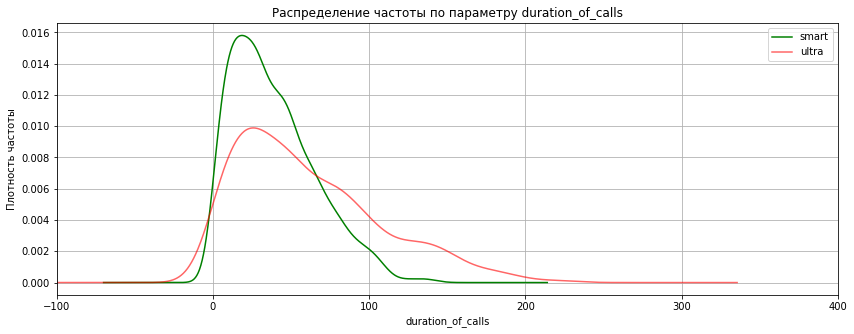

In [34]:
plt.figure(figsize=(14, 5))
smart_messages.plot( kind='kde',   color='green', label = 'smart')
ultra_messages.plot( kind='kde',  color='red', alpha=0.6, label = 'ultra')

plt.title('Распределение частоты по параметру duration_of_calls')
plt.xlabel('duration_of_calls')
plt.ylabel('Плотность частоты')
plt.legend()
plt.grid()
plt.xlim([-100,400])
plt.show()

Гистограмма плотностей отправленных сообщений тарифа смарт скошена вправо, о чем нам говорит сама гисограмма и медианное, и средние значение, которое расчитано снизу (медианное значение меньше среднего значения). Так же можно заметить, что присутсвуют значения, которые превышают включенные в тариф количество сообщений (50 сообщений в месяц).

А вот гистограмма плотностей тарифа ультра скошена вправо уже более заметно это видно и на графике, и по средниму,, и медианному значению. В отличие от тарифа смарт, в тарифе ультра нет значений, котрые превышали бы лимит  включенных сообщений (1000 сообщений в месяц).

Рассчитаем среднее, медианное, стандартное отклонение и дисперсию:

In [35]:
(
    big_set.pivot_table(
        index = 'tariff',
        values = 'number_of_messages',
        aggfunc = ['mean', 'median', (np.var), (np.std)])
)

,mean,median,var,std
,number_of_messages,number_of_messages,number_of_messages,number_of_messages
tariff,,,,
smart,38.716441,34.0,717.594201,26.787949
ultra,61.161006,51.0,2109.659183,45.931026


### Сколько тратят интернет трафика

In [36]:
gb_per_month = (big_set
                     .pivot_table(index=['month', 'tariff'],
                                         values = 'gb_used',
                                         aggfunc = sum)
                    ).reset_index()

gb_per_month

,month,tariff,gb_used
0,1.0,smart,297.0
1,1.0,ultra,119.0
2,2.0,smart,687.0
3,2.0,ultra,288.0
4,3.0,smart,1173.0
5,3.0,ultra,653.0
6,4.0,smart,1526.0
7,4.0,ultra,933.0
8,5.0,smart,2243.0
9,5.0,ultra,1298.0


<AxesSubplot:title={'center':'ultra'}, xlabel='month'>

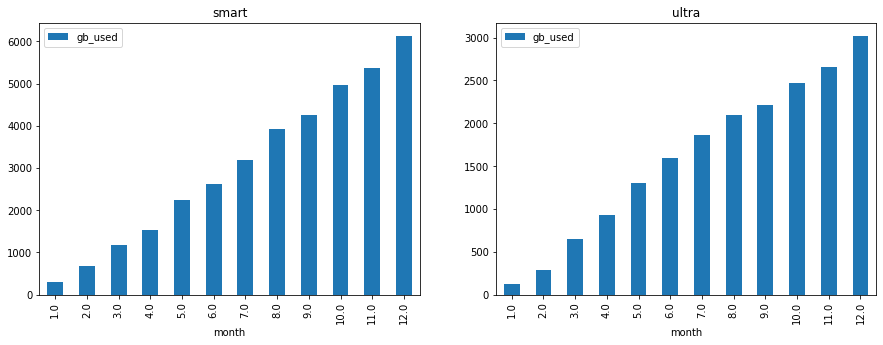

In [37]:
fig, axs = plt.subplots(1,2)

(gb_per_month
 .query('tariff == "smart"')
 .plot(x='month' , y='gb_used', kind = 'bar', title='smart', ax=axs[0], figsize = (15, 5))
)

(gb_per_month
 .query('tariff == "ultra"')
 .plot(x='month' , y='gb_used', kind = 'bar', title='ultra', ax=axs[1], figsize = (15, 5))
)

Визуализируем гистограммы плотностей потраченных гигабайтов. Но для начала выделим использованный трафик по кадому тарифу в отдельные переменные:

In [38]:
smart_gb = big_set[big_set['tariff']=='smart']['gb_used']
ultra_gb = big_set[big_set['tariff']=='ultra']['gb_used']

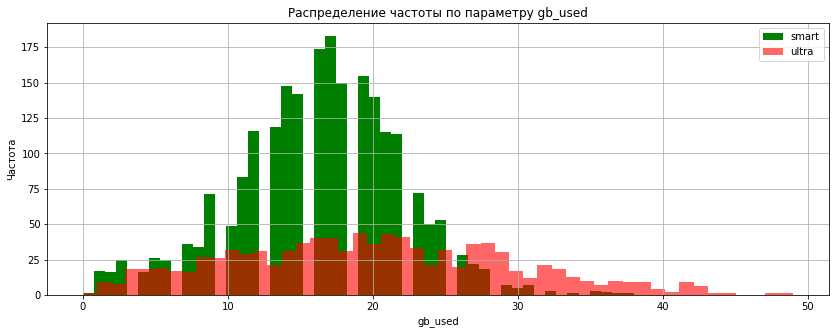

In [39]:
plt.figure(figsize=(14, 5))
 

smart_gb.hist( bins = 50,  color='green', label = 'smart')
ultra_gb.hist( bins = 50, color='red', alpha=0.6, label = 'ultra')


plt.title('Распределение частоты по параметру gb_used')
plt.xlabel('gb_used')
plt.ylabel('Частота')
plt.legend()

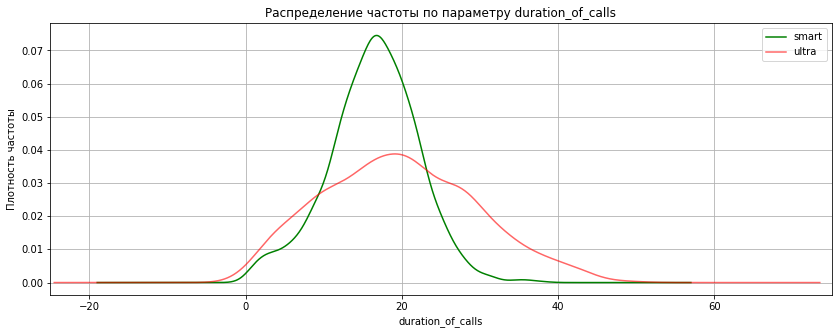

In [40]:
plt.figure(figsize=(14, 5))
smart_gb.plot( kind='kde',   color='green', label = 'smart')
ultra_gb.plot( kind='kde',  color='red', alpha=0.6, label = 'ultra')

plt.title('Распределение частоты по параметру duration_of_calls')
plt.xlabel('duration_of_calls')
plt.ylabel('Плотность частоты')
plt.legend()
plt.grid()
plt.xlim([-25,75])
plt.show()

На гистограмме плотностей распределения частоты количества интернет-трафика видно, что по тарифу смарт гистограмма без скосов. Многие пользователи превышают количество включенного в тариф интернет-трафика (15 Гб). Так же, можно отметить, что на гистограмме есть пропуски, что может говорить нам  о том, что пользователи используют интернет-трафик неравномерно.

По тарифу ультра гистограмма распределена равномерно. Только небольшое количесвто значений превышают количество включенного в тариф интернет-трафика (30 Гб). 

Рассчитаем среднее, медианное, стандартное отклонение и дисперсию:

In [41]:
(
    big_set.pivot_table(
        index = 'tariff',
        values = 'gb_used',
        aggfunc = ['mean', 'median', (np.var), (np.std)])
)

,mean,median,var,std
,gb_used,gb_used,gb_used,gb_used
tariff,,,,
smart,16.336176,17.0,32.923756,5.737923
ultra,19.694359,19.0,94.146734,9.702924


### Вывод

Посмотрим, как влияют вышерасмотренные параматеры на выручку компании, для этого выведем на экран гистограмму плотностей распределения потрченных денег клиентами при использовании того или иного тарифа. 

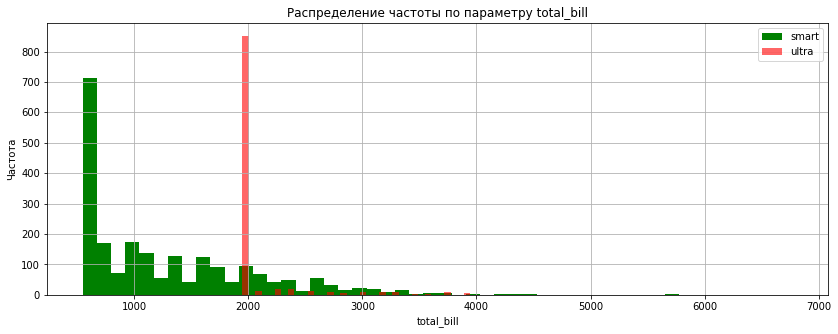

In [42]:
big_money_smart = big_set[big_set['tariff']=='smart']['total_bill']
big_money_ultra = big_set[big_set['tariff']=='ultra']['total_bill']

plt.figure(figsize=(14, 5))
 

big_money_smart.hist( bins = 50,  color='green', label = 'smart')
big_money_ultra.hist( bins = 50, color='red', alpha=0.6, label = 'ultra')


plt.title('Распределение частоты по параметру total_bill')
plt.xlabel('total_bill')
plt.ylabel('Частота')
plt.legend()

In [43]:
(
    big_set.pivot_table(
        index = 'tariff',
        values = 'total_bill',
        aggfunc = ['mean', 'median', (np.var), (np.std)]))

,mean,median,var,std
,total_bill,total_bill,total_bill,total_bill
tariff,,,,
smart,1289.973531,1023.0,669785.708006,818.404367
ultra,2070.152284,1950.0,141516.745079,376.187114


<AxesSubplot:xlabel='total_bill', ylabel='tariff'>

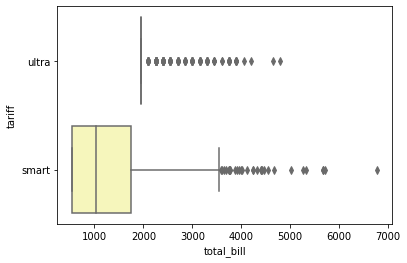

In [44]:
sns.boxplot(x = 'total_bill', y = 'tariff', data =  big_set, orient = "h", palette="Set3")

На гистограмме видно, что пользователи тарифа ультра чаще всего укладываются в сумму стандартного тарифа, а вот пользователи тарифа смарт куда реже укладываются в стандартный пакет предусмотренный тарифом и в связи с этим, они чаще переплачивают за дополнительные минуты, смс и интернет-трафик.

На боксплоте видно, что медианная выручка от тарифа смарт меньше, чем у тарифа ультра. Не смотря на то, что в тарифе ультра включено больше минут, смс и трафика, тариф ультра приносит больше приыбли, чем тариф смарт.

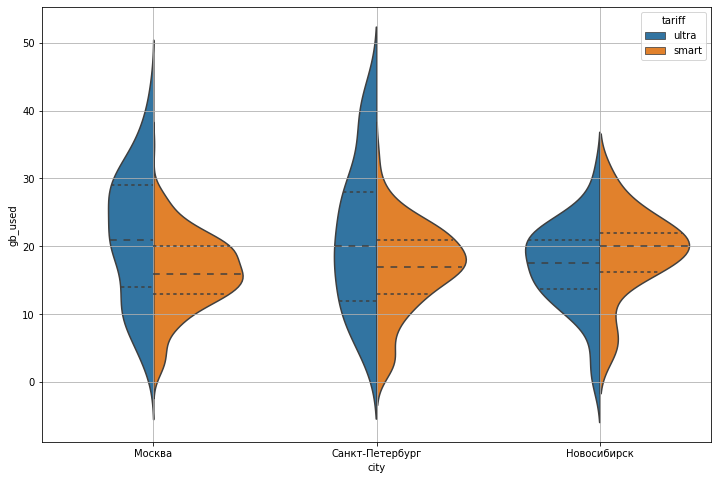

In [45]:
plt.figure(figsize=(12,8))
sns.violinplot(x='city', y='gb_used', hue='tariff', 
               data=big_set[big_set['city'].isin(users['city'].value_counts().head(3).index)],
              split=True,
              inner='quartile')
plt.grid()

## Проверка гипотиз

Проверим гипотезы:
1) Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
 
2) Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Так как мы проверяем гипотезу о равенстве средних двух генеральных совокупностей, то будем использовать метод scipy.stats.ttest_ind().

*Нулевая гипотеза H0*: Средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковые

*Альтернативная гипотеза H1*: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Критический уровень статистической значимости  alpha  принмаем равным 0,05 или 5%

Для проверкигипотезы выделим два отдельных датасета.

In [46]:
smart_tariff = big_set.query('tariff == "smart"')['total_bill'] #выделим отдельный датасет выручки по тарифу smart

ultra_tariff = big_set.query('tariff == "ultra"')['total_bill'] #выделим отдельный датасет выручки по тарифу ultra

In [47]:
smart_tariff_var = np.var(smart_tariff)
ultra_tariff_var = np.var(ultra_tariff)
display(f'Дисперсия выборки total_bill по тарифу smart {smart_tariff_var}')
display(f'Дисперсия выборки total_bill по тарифу ultra {ultra_tariff_var}')
display(f'Отношение дисперсий  {smart_tariff_var/ultra_tariff_var}')

'Дисперсия выборки total_bill по тарифу smart 669485.2209234245'

'Дисперсия выборки total_bill по тарифу ultra 141373.07325620347'

'Отношение дисперсий  4.7355921852964835'

Дисперсии не равны и отличаются в 4 раза. Поэтому в тесте будеи применять параметр equal_var = False, котрый задается, если дисперсии выборок не равны.

In [48]:
alpha = 0.05

results = st.ttest_ind(
    ultra_tariff, 
    smart_tariff,
    equal_var = False
)
    
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250


'Отвергаем нулевую гипотезу'

Значение p-value очень мало. В связи  с этим отвергаем нулевую гипотезу. Можем говорить, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются и давольно сильно.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Здесь так же проверяем гипотезу о равенстве средних двух генеральных совокупностей, поэтому будем использовать метод scipy.stats.ttest_ind().


*Нулевая гипотеза H0*: Средняя выручка пользователей из Москвы и регионов одинаковая.

*Альтернативная гипотеза H1*:  Средняя выручка пользователей из Москвы и регионов отличается.

Критический уровень статистической значимости  alpha  принмаем равным 0,05 или 5%


Для начала выделим два датасета:

1) Датасет содердит выручку пользоователей из Московского региона

2) Датасет содержит выручку со всех решиново, кроме Московского.

In [49]:
moscow_region = big_set.query('city == "Москва"')['total_bill'] #выделим отдельный датасет выручки по Московскому региону

other_region = big_set.query('city != "Москва"')['total_bill'] #выделим отдельный датасет выручки по остальным регионам

In [50]:
moscow_region_var = np.var(moscow_region)
other_region_var = np.var(other_region)
display(f'Дисперсия выборки total_bill по тарифу smart {moscow_region_var}')
display(f'Дисперсия выборки total_bill по тарифу ultra {other_region_var}')
display(f'Отношение дисперсий  {moscow_region_var/other_region_var}')

'Дисперсия выборки total_bill по тарифу smart 564710.7117467273'

'Дисперсия выборки total_bill по тарифу ultra 653886.3270894174'

'Отношение дисперсий  0.8636221440206143'

In [51]:
alpha = 0.05

results = st.ttest_ind(
    moscow_region, 
    other_region,
    equal_var = False)
    
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298


'Не получилось отвергнуть нулевую гипотезу'

Полученное значение p-value показывает нам, что с вероятностью 53% средння выручка Москокого региона и остальных регионов равно, что значительно больше заданного значения в 5%. В связи с этим отвергать нулевую гипотезу мы не можем.

### Вывод

После проверки гипотез можно сказать:

1) Средние выручки тарифов разлияаются и давольно сильно

2) Средния выручка Московского региона и других регионов равно.

## Общий вывод

Тариф ультра приносит больше прибыли для компании, не смотря на то, что пользователи не покупают дополнительные минуты, сообщения и интернет-трафик в отличии от тарифа смарт. Так как в тарифе ультра клиентов меньше, то рекламные кампании выгоднее акцентировать на тарифе ультра. 

Медианная выручка по тарифу ультра больше практически на 1000 рублей, чем по тарифу смарт.

Так же, в исследоваии были проверены несколько гипотез. По которым можно сделать вывод, что средние выручки по тарифам сильно разнятся и выручка Московского региона и других регионов равно. 